#### Performing energy signature

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import numpy as np
from datetime import datetime, timedelta

#### Function to Plotting data:

In [2]:
def plotting(dat,tit):
    # model for regression
    model = sm.OLS(dat.total_power,sm.add_constant(dat.temp_diff))
    # fitting the model
    results = model.fit()
    # plotting
    plt.figure()
    plt.plot(dat.temp_diff,results.predict(),'r', linewidth=1, label='regression')
    error= results.summary()
    print('summary: ',error)
    plt.scatter(dat.temp_diff,dat.total_power, s=5, label='observations')
    plt.xlabel('deltaT [C]')
    plt.ylabel('Energy Consumption [kWh]')
    plt.title(tit)
    plt.ylim(-0.1)
    plt.legend()

#### importing csv file and preparing simulated data

In [4]:
# importing csv
data = pd.read_csv('../Output/simulation_Data_2020.csv',sep=',',decimal=',',index_col=0, low_memory=False)
cols = data.columns
for col in cols:
    # converting to float
    data[col] = data[col].astype(float)

time = []
for i in range(len(data.index)):
    # reading  index
    t = data.index[i]
    # splitting day and hour
    #day, hour = t.split('  ')
    timestamp = datetime.strptime(t, "%Y/%m/%d  %H:%M:%S")
    time.append(timestamp)
data.index = pd.to_datetime(time)
data

,t_in,t_out,temp_diff,power_heating,power_cooling,power_electricity,total_power
2020-01-01 01:00:00,11.60,-7.45,19.048198,7.31,0.0,0.2,7.31
2020-01-01 02:00:00,11.60,-7.56,19.160009,7.36,0.0,0.2,7.36
2020-01-01 03:00:00,11.58,-8.46,20.043659,7.63,0.0,0.2,7.63
2020-01-01 04:00:00,11.54,-9.18,20.710560,7.82,0.0,0.2,7.82
2020-01-01 05:00:00,11.49,-9.71,21.201178,7.97,0.0,0.2,7.97
...,...,...,...,...,...,...,...
2020-12-31 20:00:00,12.01,-4.09,16.098251,5.01,0.0,0.2,5.01
2020-12-31 21:00:00,12.00,-4.39,16.387040,5.13,0.0,0.2,5.13
2020-12-31 22:00:00,11.99,-4.69,16.675363,5.26,0.0,0.2,5.26
2020-12-31 23:00:00,11.98,-5.18,17.150516,5.46,0.0,0.2,5.46


In [5]:
#%% SPLITTING DATA IN HOURLY, WEEKLY AND DAILY
# frequency conversion according to hour
dataH = data.resample('H').mean()
# removing missing values
dataH = dataH.dropna()
# frequency conversion according to day
dataD = data.resample('D').mean()
# removing missing values
dataD = dataD.dropna()
# frequency conversion according to week
dataW = data.resample('W').mean()
# removing missing values
dataW = dataW.dropna()
# frequency conversion according to month
dataM = data.resample('M').mean()
# removing missing values
dataM = dataM.dropna()

In [6]:
dataD

,t_in,t_out,temp_diff,power_heating,power_cooling,power_electricity,total_power
2020-01-01,11.532083,-8.300833,19.831405,7.555833,0.0,0.200000,7.555833
2020-01-02,13.269167,-8.960833,22.229482,7.877083,0.0,5.661250,7.877083
2020-01-03,13.177500,-11.693333,24.870045,8.052500,0.0,5.660833,8.052500
2020-01-04,13.360833,-10.602083,23.963872,7.764583,0.0,5.672083,7.764583
2020-01-05,13.852500,-8.729583,22.581756,7.329583,0.0,5.667083,7.329583
...,...,...,...,...,...,...,...
2020-12-27,16.084583,0.434167,15.650713,4.449167,0.0,5.667917,4.449167
2020-12-28,16.568750,2.280000,14.289181,3.302083,0.0,5.668333,3.302083
2020-12-29,16.972083,3.190833,13.782204,2.655000,0.0,5.669167,2.655000
2020-12-30,12.788333,0.384167,12.404140,1.505833,0.0,0.200000,1.505833


#### DIVIDING DATA IN SUMMER AND WINTER

In [7]:
dataSum = []
dataWint = []
for i in range(len(data.index)):
    t = data.index[i]
    temp = {'t_in':data.t_in[i],'t_out':data.t_out[i], 'temp_diff':data.temp_diff[i], 'power_heating':data.power_heating[i], 'power_cooling':data.power_cooling[i],'power_electricity':data.power_electricity[i], 'total_power':data.total_power[i]}
    if ((int(t.month) == 5) | (int(t.month) == 6) | (int(t.month) == 7) | (int(t.month) == 8) | (int(t.month) == 9)):
        dataSum.append(temp)
    else:
        dataWint.append(temp)
dataSum = pd.DataFrame.from_dict(dataSum)
dataWint = pd.DataFrame.from_dict(dataWint)
#%% DIVIDING DATA IN SUMMER AND WINTER - month
dataMSum = []
dataMWint = []
for i in range(len(dataM.index)):
    t = dataM.index[i]
    temp = {'t_in':dataM.t_in[i],'t_out':dataM.t_out[i], 'temp_diff':dataM.temp_diff[i], 'power_heating':dataM.power_heating[i], 'power_cooling':dataM.power_cooling[i],'power_electricity':dataM.power_electricity[i], 'total_power':dataM.total_power[i]}
    if ((int(t.month) == 5) | (int(t.month) == 6) | (int(t.month) == 7) | (int(t.month) == 8) | (int(t.month) == 9)):
        dataMSum.append(temp)
    else:
        dataMWint.append(temp)
dataMS = pd.DataFrame.from_dict(dataMSum)
dataMW = pd.DataFrame.from_dict(dataMWint)
#%% DIVIDING DATA IN SUMMER AND WINTER - hour
dataHSum = []
dataHWint = []
for i in range(len(dataH.index)):
    t = dataH.index[i]
    temp = {'t_in':dataH.t_in[i],'t_out':dataH.t_out[i], 'temp_diff':dataH.temp_diff[i], 'power_heating':dataH.power_heating[i], 'power_cooling':dataH.power_cooling[i],'power_electricity':dataH.power_electricity[i], 'total_power':dataH.total_power[i]}
    if ((int(t.month) == 5) | (int(t.month) == 6) | (int(t.month) == 7) | (int(t.month) == 8) | (int(t.month) == 9)):
        dataHSum.append(temp)
    else:
        dataHWint.append(temp)
dataHS = pd.DataFrame.from_dict(dataHSum)
dataHW = pd.DataFrame.from_dict(dataHWint)
#%% DIVIDING DATA IN SUMMER AND WINTER - week
dataWSum = []
dataWWint = []
for i in range(len(dataW.index)):
    t = dataW.index[i]
    temp = {'t_in':dataW.t_in[i],'t_out':dataW.t_out[i], 'temp_diff':dataW.temp_diff[i], 'power_heating':dataW.power_heating[i], 'power_cooling':dataW.power_cooling[i],'power_electricity':dataW.power_electricity[i], 'total_power':dataW.total_power[i]}
    if ((int(t.month) == 5) | (int(t.month) == 6) | (int(t.month) == 7) | (int(t.month) == 8) | (int(t.month) == 9)):
        dataWSum.append(temp)
    else:
        dataWWint.append(temp)
dataWS = pd.DataFrame.from_dict(dataWSum)
dataWW = pd.DataFrame.from_dict(dataWWint)
#%% DIVIDING DATA IN SUMMER AND WINTER - day
dataDSum = []
dataDWint = []
for i in range(len(dataD.index)):
    t = dataD.index[i]
    temp = {'t_in':dataD.t_in[i],'t_out':dataD.t_out[i], 'temp_diff':dataD.temp_diff[i], 'power_heating':dataD.power_heating[i], 'power_cooling':dataD.power_cooling[i],'power_electricity':dataD.power_electricity[i], 'total_power':dataD.total_power[i]}
    if ((int(t.month) == 5) | (int(t.month) == 6) | (int(t.month) == 7) | (int(t.month) == 8) | (int(t.month) == 9)):
        dataDSum.append(temp)
    else:
        dataDWint.append(temp)
dataDS = pd.DataFrame.from_dict(dataDSum)
dataDW = pd.DataFrame.from_dict(dataDWint)

#### REGRESSION (Ordinary Least Square) - winter

summary:                              OLS Regression Results                            
Dep. Variable:            total_power   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     7191.
Date:                Wed, 26 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:34:20   Log-Likelihood:                -11524.
No. Observations:                5088   AIC:                         2.305e+04
Df Residuals:                    5086   BIC:                         2.306e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8597      0.090    -31.78

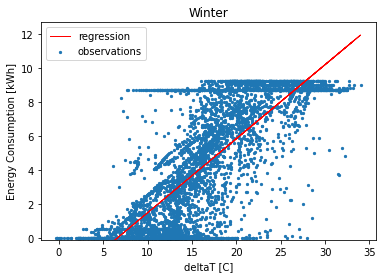

In [8]:
plotting(dataWint, 'Winter')

summary:                              OLS Regression Results                            
Dep. Variable:            total_power   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     6795.
Date:                Wed, 26 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:34:26   Log-Likelihood:                -11068.
No. Observations:                4876   AIC:                         2.214e+04
Df Residuals:                    4874   BIC:                         2.215e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7944      0.093    -30.19

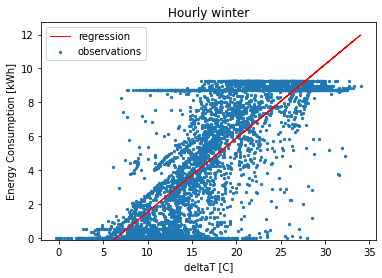

In [9]:
plotting(dataHW, 'Hourly winter')

summary:                              OLS Regression Results                            
Dep. Variable:            total_power   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1328.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           9.24e-93
Time:                        20:03:24   Log-Likelihood:                -306.58
No. Observations:                 212   AIC:                             617.2
Df Residuals:                     210   BIC:                             623.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8435      0.207    -13.72

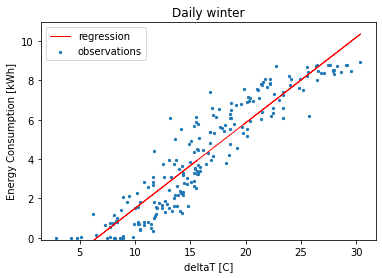

In [39]:
plotting(dataDW, 'Daily winter')

summary:                              OLS Regression Results                            
Dep. Variable:            total_power   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1362.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           6.26e-26
Time:                        20:05:56   Log-Likelihood:                -11.346
No. Observations:                  31   AIC:                             26.69
Df Residuals:                      29   BIC:                             29.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1742      0.238    -17.53

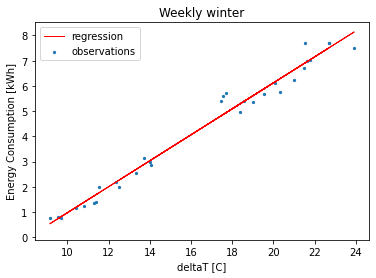

In [40]:
plotting(dataWW, 'Weekly winter')

summary:                              OLS Regression Results                            
Dep. Variable:            total_power   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     736.1
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           1.27e-06
Time:                        20:06:00   Log-Likelihood:                 2.4076
No. Observations:                   7   AIC:                           -0.8153
Df Residuals:                       5   BIC:                           -0.9235
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2341      0.323    -13.12

/home/ict4bd/Downloads/myenv/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


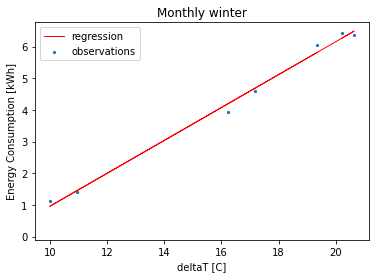

In [41]:
plotting(dataMW, 'Monthly winter')

#### REGRESSION (Ordinary Least Square) - summer

summary:                              OLS Regression Results                            
Dep. Variable:            total_power   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     207.9
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           7.04e-46
Time:                        20:06:13   Log-Likelihood:                -8313.1
No. Observations:                3672   AIC:                         1.663e+04
Df Residuals:                    3670   BIC:                         1.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6044      0.074     21.82

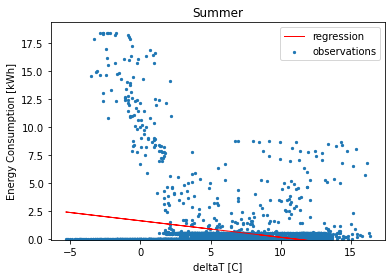

In [42]:
plotting(dataSum, 'Summer')

summary:                              OLS Regression Results                            
Dep. Variable:            total_power   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     199.8
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           3.66e-44
Time:                        20:06:16   Log-Likelihood:                -8034.7
No. Observations:                3519   AIC:                         1.607e+04
Df Residuals:                    3517   BIC:                         1.609e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6394      0.076     21.66

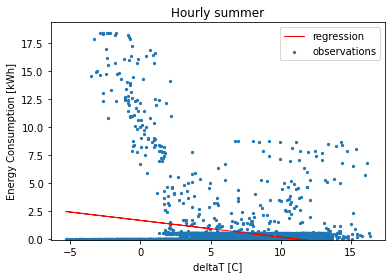

In [43]:
plotting(dataHS, 'Hourly summer')

summary:                              OLS Regression Results                            
Dep. Variable:            total_power   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     9.025
Date:                Sat, 05 Jun 2021   Prob (F-statistic):            0.00312
Time:                        20:06:18   Log-Likelihood:                -253.54
No. Observations:                 153   AIC:                             511.1
Df Residuals:                     151   BIC:                             517.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3305      0.234      5.69

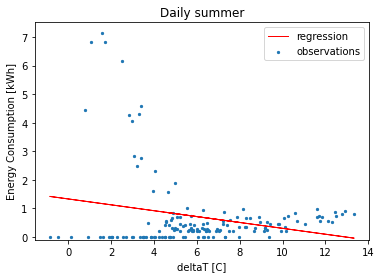

In [44]:
plotting(dataDS,'Daily summer')

summary:                              OLS Regression Results                            
Dep. Variable:            total_power   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     10.83
Date:                Sat, 05 Jun 2021   Prob (F-statistic):            0.00365
Time:                        20:06:21   Log-Likelihood:                -16.923
No. Observations:                  22   AIC:                             37.85
Df Residuals:                      20   BIC:                             40.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0062      0.413      4.86

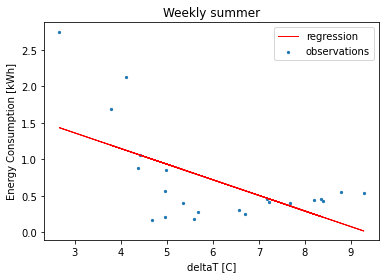

In [45]:
plotting(dataWS, 'Weekly summer')

/home/ict4bd/Downloads/myenv/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


summary:                              OLS Regression Results                            
Dep. Variable:            total_power   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     6.009
Date:                Sat, 05 Jun 2021   Prob (F-statistic):             0.0916
Time:                        20:06:24   Log-Likelihood:                0.57880
No. Observations:                   5   AIC:                             2.842
Df Residuals:                       3   BIC:                             2.061
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0001      0.546      3.66

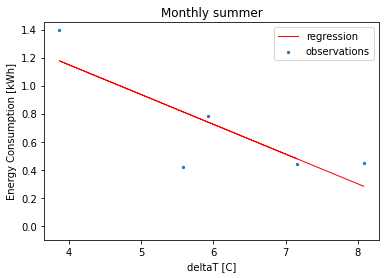

In [46]:
plotting(dataMS, 'Monthly summer')